# Curso: Machine Learning: Intro a sistemas de recomendação em Python

## Objetivos
* Pense em heurísticas e algoritmos
* Gere recomendações baseadas em similaridade de usuários
* Crie sistemas baseados em filtros colaborativos
* Recomende baseado em modelos de itens e usuários
* Implemente K-Nearest-Neighbours do zero
* Entenda os desafios de recomendação



Link: https://cursos.alura.com.br/course/introducao-a-sistemas-de-recomendacao-com-python

## Importando as bibliotecas

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o dataset

In [274]:
filmes = pd.read_csv('datasets/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [275]:
print(f'O dataset filme possui {filmes.shape[0]} observações e {filmes.shape[1]} atributos')

O dataset filme possui 9742 observações e 3 atributos


In [276]:
notas = pd.read_csv('datasets/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [277]:
print(f'O dataset notas possui {notas.shape[0]} observações e {notas.shape[1]} atributos')

O dataset notas possui 100836 observações e 4 atributos


In [278]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Modelos de recomendação

### Modelo 03
Sem conhecer o usuário, recomendação pelo filme com a maior quantidade de votos

In [279]:
total_votos = notas.groupby('filmeId')[['nota']].count().reset_index().rename({'nota': 'total_de_votos'}, axis=1)
total_votos

,filmeId,total_de_votos
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [280]:
filmes = pd.merge(filmes, total_votos, how='left', on='filmeId')
filmes.sort_values(by='total_de_votos', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
97,110,Braveheart (1995),Action|Drama|War,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0
461,527,Schindler's List (1993),Drama|War,220.0


In [281]:
notas_medias = notas.groupby('filmeId')[['nota']].mean().rename({'nota': 'nota_media'}, axis=1)
notas_medias

,nota_media
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [282]:
filmes = pd.merge(filmes, notas_medias, how='left', on='filmeId')
filmes.sort_values(by='nota_media', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
9094,143511,Human (2015),Documentary,1.0,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
4251,6201,Lady Jane (1986),Drama|Romance,1.0,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0
9122,145994,Formula of Love (1984),Comedy,1.0,5.0


In [283]:
filmes.sort_values(by='total_de_votos', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
97,110,Braveheart (1995),Action|Drama|War,237.0,4.031646
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982
461,527,Schindler's List (1993),Drama|War,220.0,4.225000


In [284]:
filmes.query('total_de_votos >= 10').sort_values(by='nota_media', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
796,1041,Secrets & Lies (1996),Drama,11.0,4.590909
2582,3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
883,1178,Paths of Glory (1957),Drama|War,12.0,4.541667
841,1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
1762,2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
918,1217,Ran (1985),Drama|War,15.0,4.433333
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
731,951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1407,1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000
2593,3468,"Hustler, The (1961)",Drama,18.0,4.333333


In [285]:
filmes_com_mais_de_30_votos = filmes.query('total_de_votos >= 30')
filmes_com_mais_de_30_votos.sort_values(by='nota_media', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,45.0,4.300000
659,858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
975,1276,Cool Hand Luke (1967),Drama,57.0,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
686,904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
966,1267,"Manchurian Candidate, The (1962)",Crime|Thriller|War,30.0,4.250000


### Modelo 02
Sem conhecer o usuário, recomendação pelo filme com as maiores notas médias e filtrando filmes com pelo menos 30 votos

In [286]:
filmes_com_mais_de_30_votos.sort_values(by='nota_media', ascending=False).head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War,45.0,4.300000
659,858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
975,1276,Cool Hand Luke (1967),Drama,57.0,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
686,904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
966,1267,"Manchurian Candidate, The (1962)",Crime|Thriller|War,30.0,4.250000


### modelo 03
Baseado no gênero dos filmes assistidos pelo usuário

In [287]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]

In [288]:
filmes_com_mais_de_30_votos.query('filmeId in @eu_assisti')

,filmeId,titulo,generos,total_de_votos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
6,7,Sabrina (1995),Comedy|Romance,54.0,3.185185
9,10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
10,11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
18,19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
20,21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382


In [289]:
aventura_infantil_e_fantasia = filmes_com_mais_de_30_votos.query('generos == "Adventure|Children|Fantasy"')
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values(by='nota_media', ascending=False).drop(eu_assisti, errors='ignore').head(10)

,filmeId,titulo,generos,total_de_votos,nota_media
3574,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
1617,2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
6075,41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294


### Modelo 03:
Modelo baseado na distância entre as notas dos filmes de dois usuarios

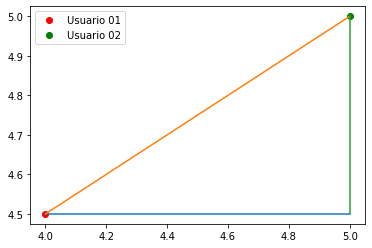

In [290]:
plt.plot(4,4.5, 'ro', label='Usuario 01')
plt.plot(5,5, 'go', label='Usuario 02')
plt.legend()
plt.plot([4, 5], [4.5, 4.5], linestyle="-")
plt.plot([4, 5], [4.5, 5], linestyle="-")
plt.plot([5, 5], [5, 4.5], linestyle="-")
plt.show()

In [291]:
def distancia_de_vetores(nota1, nota2):
    return np.linalg.norm(nota1 - nota2)

In [292]:
a = np.array([4,4.5])
b = np.array([5,5])

distancia_de_vetores(b, a)

1.118033988749895

In [293]:
def notas_do_usuario(usuario):
    df_notas = notas.query(f'usuarioId == {usuario}')[['filmeId', 'nota']].set_index('filmeId')
    return df_notas

In [294]:
usuario1 = notas_do_usuario(1)
usuario2 = notas_do_usuario(4)

In [295]:
diferença = usuario1.merge(usuario2, how='inner', suffixes=('_esquerda', '_direita'), on='filmeId')
diferença

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [296]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [297]:
def distancia_de_usuarios(idUsuario01, idUsuario02, minimo=5):
    usuario1 = notas_do_usuario(idUsuario01)
    usuario2 = notas_do_usuario(idUsuario02)
    diferenca = usuario1.merge(usuario2, how='inner', suffixes=('_esquerda', '_direita'), on='filmeId')
    if len(diferenca) < minimo:
        return None 
    distancia = distancia_de_vetores(diferenca['nota_esquerda'], diferenca['nota_direita'])
    return [idUsuario01, idUsuario02, distancia]    

In [298]:
distancia_de_usuarios(1,3)

[1, 3, 8.200609733428363]

In [299]:
def distancia_de_todos(voce_id, n=None):
    todos_os_usuarios = notas.usuarioId.unique()
    if n:
        todos_os_usuarios = todos_os_usuarios[:n]
    distancias = [distancia_de_usuarios(voce_id, outro_id) for outro_id in todos_os_usuarios]
    distancias = filter(None, distancias)
    distancias = pd.DataFrame(distancias, columns=['voceId', 'outroId', 'nota'])
    return distancias
    
distancia_de_todos(10, 10)

,voceId,outroId,nota
0,10,1,7.858117
1,10,2,4.949747
2,10,4,5.744563
3,10,7,9.219544
4,10,10,0.000000


In [300]:
def knn(voce_id, k_mais_proximo_de=10, numero_de_usuarios_a_analisar=None):
    distancias = distancia_de_todos(voce_id, numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values(by='nota')
    return distancias.query('outroId != @voce_id').head(k_mais_proximo_de)

knn(1, 10, 10)

,voceId,outroId,nota
7,1,9,1.000000
3,1,5,3.741657
6,1,8,3.741657
5,1,7,7.106335
8,1,10,7.858117
1,1,3,8.200610
4,1,6,8.602325
2,1,4,11.135529


In [301]:
def sugere_para(voce_id, k_mais_proximo_de=10, numero_de_usuarios_a_analisar=None):
    similares = knn(voce_id, k_mais_proximo_de=k_mais_proximo_de, numero_de_usuarios_a_analisar=numero_de_usuarios_a_analisar)
    filmes_ja_vistos = notas.query('usuarioId == @voce_id').filmeId
    
    id_dos_similares = similares.outroId
    notas_similares = notas.query('usuarioId in @id_dos_similares')[['filmeId', 'nota']]
    
    recomendacoes = notas_similares.query('filmeId not in @filmes_ja_vistos')
    recomendacoes = recomendacoes.groupby('filmeId').mean().sort_values(by='nota', ascending=False)
    
    return recomendacoes.join(filmes.set_index('filmeId'))

In [302]:
sugere_para(1, 5).head(20)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
7147,5.000000,Big Fish (2003),Drama|Fantasy|Romance,69.0,3.833333
2300,5.000000,"Producers, The (1968)",Comedy,33.0,3.969697
5952,5.000000,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
5902,5.000000,Adaptation (2002),Comedy|Drama|Romance,46.0,3.945652
8636,5.000000,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
48394,5.000000,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
5816,5.000000,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
4995,5.000000,"Beautiful Mind, A (2001)",Drama|Romance,123.0,4.000000
60069,5.000000,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi,104.0,4.057692


In [303]:
notas.query('usuarioId == 1').set_index('filmeId').join(filmes.set_index('filmeId')).sort_values(by='nota', ascending=False).head(20)

,usuarioId,nota,momento,titulo,generos,total_de_votos,nota_media
filmeId,,,,,,,
5060,1,5.0,964984002,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,46.0,3.934783
2872,1,5.0,964981680,Excalibur (1981),Adventure|Fantasy,25.0,3.640000
1291,1,5.0,964981909,Indiana Jones and the Last Crusade (1989),Action|Adventure,140.0,4.046429
1298,1,5.0,964984086,Pink Floyd: The Wall (1982),Drama|Musical,23.0,3.760870
2948,1,5.0,964982191,From Russia with Love (1963),Action|Adventure|Thriller,36.0,3.750000
2947,1,5.0,964982176,Goldfinger (1964),Action|Adventure|Thriller,53.0,3.839623
2944,1,5.0,964981872,"Dirty Dozen, The (1967)",Action|Drama|War,32.0,3.968750
2899,1,5.0,964982703,Gulliver's Travels (1939),Adventure|Animation|Children,3.0,3.000000
2858,1,5.0,964980868,American Beauty (1999),Drama|Romance,204.0,4.056373


In [304]:
filmes.query("'Horror' in generos").sample(30)

,filmeId,titulo,generos,total_de_votos,nota_media
8134,101739,Evil Dead (2013),Horror,2.0,3.250000
4963,7564,Kwaidan (Kaidan) (1964),Horror,2.0,2.500000
1890,2513,Pet Sematary (1989),Horror,10.0,2.850000
1461,1984,Halloween III: Season of the Witch (1982),Horror,3.0,2.166667
1446,1969,"Nightmare on Elm Street 2: Freddy's Revenge, A...",Horror,10.0,2.350000
1854,2465,Deadly Friend (1986),Horror,3.0,1.500000
2921,3917,Hellraiser (1987),Horror,15.0,3.366667
1458,1981,Friday the 13th Part VIII: Jason Takes Manhatt...,Horror,3.0,2.000000
857,1128,"Fog, The (1980)",Horror,5.0,2.500000
8508,114044,Honeymoon (2014),Horror,1.0,3.500000


In [316]:
notas_novo_usuario = [
    [3264, 5],
    [2710, 5],
    [1982, 5],
    [1690, 5],
    [2762, 4],
    [4148, 5],
    [1997, 5],
    [8874, 4],
    [1261, 4]
]
len(notas_novo_usuario)

9

In [317]:
def novo_usuario(notas_novo_usuario):
    novo_usuario_id = notas['usuarioId'].max() + 1
    notas_do_usuario_novo = pd.DataFrame(notas_novo_usuario, columns=['filmeId', 'nota'])
    notas_do_usuario_novo['usuarioId'] = novo_usuario_id
    print(f'Id do usuário cadastrado: {novo_usuario_id}')
    return pd.concat([notas, notas_do_usuario_novo])

In [318]:
notas = novo_usuario(notas_novo_usuario)

Id do usuário cadastrado: 612


In [319]:
notas.shape

(100852, 4)

In [326]:
sugere_para(612, 15).head(20)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
501,5.0,Naked (1993),Drama,6.0,3.666667
3303,5.0,Black Tar Heroin: The Dark End of the Street (...,Documentary,1.0,5.000000
4006,5.0,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi,7.0,3.357143
95149,5.0,Superman/Batman: Public Enemies (2009),Action|Animation|Fantasy,1.0,5.000000
4021,5.0,Before Night Falls (2000),Drama,5.0,4.300000
4117,5.0,Hope and Glory (1987),Drama,3.0,4.333333
93838,5.0,The Raid: Redemption (2011),Action|Crime,9.0,4.333333
93563,5.0,Lockout (2012),Action|Sci-Fi|Thriller,3.0,3.166667
92420,5.0,Chronicle (2012),Action|Sci-Fi|Thriller,8.0,3.375000


In [314]:
notas.query('usuarioId == 611')

,usuarioId,filmeId,nota,momento
0,611,3264,5.0,NaN
1,611,2710,5.0,NaN
2,611,1982,5.0,NaN
3,611,1690,5.0,NaN
4,611,2762,4.0,NaN
5,611,4148,5.0,NaN
6,611,1997,5.0,NaN


In [166]:
filmes[filmes.generos.str.contains('Horror')].query('total_de_votos > 20').sample(30)

,filmeId,titulo,generos,total_de_votos,nota_media
1033,1345,Carrie (1976),Drama|Fantasy|Horror|Thriller,36.0,3.347222
1035,1347,"Nightmare on Elm Street, A (1984)",Horror|Thriller,27.0,3.000000
3061,4105,"Evil Dead, The (1981)",Fantasy|Horror|Thriller,22.0,3.818182
960,1261,Evil Dead II (Dead by Dawn) (1987),Action|Comedy|Fantasy|Horror,34.0,4.044118
1846,2455,"Fly, The (1986)",Drama|Horror|Sci-Fi|Thriller,43.0,3.383721
2067,2746,Little Shop of Horrors (1986),Comedy|Horror|Musical,39.0,3.333333
915,1214,Alien (1979),Horror|Sci-Fi,146.0,3.969178
1972,2617,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller,87.0,3.120690
1616,2160,Rosemary's Baby (1968),Drama|Horror|Thriller,32.0,4.171875
1275,1690,Alien: Resurrection (1997),Action|Horror|Sci-Fi,45.0,2.922222


In [335]:
notas = notas.query('filmeId in @filmes_com_mais_de_30_votos.filmeId')

In [336]:
sugere_para(612, 15).head(20)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
104841,5.000000,Gravity (2013),Action|Sci-Fi|IMAX,32.0,3.578125
497,5.000000,Much Ado About Nothing (1993),Comedy|Romance,43.0,3.813953
88129,5.000000,Drive (2011),Crime|Drama|Film-Noir|Thriller,32.0,3.765625
914,5.000000,My Fair Lady (1964),Comedy|Drama|Musical|Romance,35.0,4.042857
102125,5.000000,Iron Man 3 (2013),Action|Sci-Fi|Thriller|IMAX,32.0,3.562500
57669,4.875000,In Bruges (2008),Comedy|Crime|Drama|Thriller,41.0,4.158537
78499,4.875000,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091
296,4.769231,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
76093,4.750000,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,53.0,3.943396


In [348]:
filmes.query("filmeId == @a")

,filmeId,titulo,generos,total_de_votos,nota_media
960,1261,Evil Dead II (Dead by Dawn) (1987),Action|Comedy|Fantasy|Horror,34.0,4.044118
1275,1690,Alien: Resurrection (1997),Action|Horror|Sci-Fi,45.0,2.922222
1472,1997,"Exorcist, The (1973)",Horror|Mystery,53.0,3.801887
2035,2710,"Blair Witch Project, The (1999)",Drama|Horror|Thriller,64.0,2.796875
2078,2762,"Sixth Sense, The (1999)",Drama|Horror|Mystery,179.0,3.893855
3090,4148,Hannibal (2001),Horror|Thriller,39.0,2.935897
5335,8874,Shaun of the Dead (2004),Comedy|Horror,77.0,4.006494


In [347]:
a = list(notas.query('usuarioId == 612').filmeId)
a

[2710, 1690, 2762, 4148, 1997, 8874, 1261]

In [350]:
notas_novo_usuario = [
    [3264, 5],
    [2710, 5],
    [1982, 5],
    [1690, 5],
    [2762, 4],
    [4148, 5],
    [1997, 5],
    [8874, 4],
    [1261, 4],
    [104841, 1],
    [102125, 1],
    [110102, 1],
    [76093, 2]   
]

notas = novo_usuario(notas_novo_usuario)

Id do usuário cadastrado: 613


In [352]:
sugere_para(613).head(20)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
47099,5.000000,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
2490,5.000000,Payback (1999),Action|Thriller,45.0,3.422222
30812,5.000000,"Aviator, The (2004)",Drama,35.0,3.528571
106782,5.000000,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54.0,3.916667
81591,5.000000,Black Swan (2010),Drama|Thriller,42.0,3.630952
74458,5.000000,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
68237,5.000000,Moon (2009),Drama|Mystery|Sci-Fi|Thriller,32.0,3.968750
2231,5.000000,Rounders (1998),Drama,36.0,3.861111
8917,5.000000,Team America: World Police (2004),Action|Adventure|Animation|Comedy,32.0,3.468750


In [353]:
notas_novo_usuario = [
    [3264, 5],
    [2710, 5],
    [1982, 5],
    [1690, 5],
    [2762, 4],
    [4148, 5],
    [1997, 5],
    [8874, 4],
    [1261, 4],
    [104841, 1],
    [102125, 1],
    [110102, 1],
    [76093, 2],
    [4973, 1],
    [8917, 1]
]

notas = novo_usuario(notas_novo_usuario)

Id do usuário cadastrado: 614


In [354]:
sugere_para(614).head(20)

,nota,titulo,generos,total_de_votos,nota_media
filmeId,,,,,
1233,5.000000,"Boot, Das (Boat, The) (1981)",Action|Drama|War,40.0,4.212500
1204,5.000000,Lawrence of Arabia (1962),Adventure|Drama|War,45.0,4.300000
69757,5.000000,(500) Days of Summer (2009),Comedy|Drama|Romance,42.0,3.666667
2076,5.000000,Blue Velvet (1986),Drama|Mystery|Thriller,46.0,3.945652
2490,5.000000,Payback (1999),Action|Thriller,45.0,3.422222
109374,5.000000,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52.0,3.778846
1267,5.000000,"Manchurian Candidate, The (1962)",Crime|Thriller|War,30.0,4.250000
348,5.000000,Bullets Over Broadway (1994),Comedy,30.0,3.583333
55247,5.000000,Into the Wild (2007),Action|Adventure|Drama,41.0,3.902439
